# `SOLUTION`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-dark')
 

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\Portfolio-Projects-Repository\Synthea Datasets\Solutions\business_problems\data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.sample()

,encounter_id,encounter_start,encounter_stopped,patient,organization,provider,class,readmission,encounter_x,total_conditions,encounter_y,careplan_duration,total_careplans,total_careplan_reasons,medication_duration,encounter,medicins,medicine_base_cost,medicine_total_cost,patient_id,patient_age,marital,race,ethnicity,gender
28606,b7d4b58f-2edb-44ac-a1d0-6a311f5ec1a6,1978-01-08 17:42:20,1978-01-08 18:12:20,fd3acd35-add1-4634-8c90-68ed0f638fde,1f8bf1bc-2c07-3ea6-9782-0a8eb036ba4f,04d668dc-0865-3cb6-8bbd-b79ec253bad7,wellness,0,NaN,NaN,NaN,NaN,NaN,NaN,371.0,b7d4b58f-2edb-44ac-a1d0-6a311f5ec1a6,1.0,263.49,3161.88,fd3acd35-add1-4634-8c90-68ed0f638fde,70,s,white,nonhispanic,m


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   encounter_id            53346 non-null  object 
 1   encounter_start         53346 non-null  object 
 2   encounter_stopped       53346 non-null  object 
 3   patient                 53346 non-null  object 
 4   organization            53346 non-null  object 
 5   provider                53346 non-null  object 
 6   class                   53346 non-null  object 
 7   readmission             53346 non-null  int64  
 8   encounter_x             7650 non-null   object 
 9   total_conditions        7650 non-null   float64
 10  encounter_y             3472 non-null   object 
 11  careplan_duration       1951 non-null   float64
 12  total_careplans         3472 non-null   float64
 13  total_careplan_reasons  3472 non-null   float64
 14  medication_duration     26037 non-null

In [6]:
data.drop(columns=['encounter_x','encounter_y'],inplace=True)

In [7]:
data.drop(columns=['encounter'],inplace=True)

In [8]:
print('Null Values ->')
data.isnull().sum()[data.isnull().sum()>0].reset_index()

Null Values ->


,index,0
0,total_conditions,45696
1,careplan_duration,51395
2,total_careplans,49874
3,total_careplan_reasons,49874
4,medication_duration,27309
5,medicins,26077
6,medicine_base_cost,26077
7,medicine_total_cost,26077


In [9]:
null_columns = data.isnull().sum()[data.isnull().sum()>0].reset_index().iloc[:,0].values.tolist()

In [10]:
data[null_columns]=data[null_columns].fillna(0)

In [11]:
data.shape

(53346, 22)

In [12]:
data.isnull().sum()

encounter_id              0
encounter_start           0
encounter_stopped         0
patient                   0
organization              0
provider                  0
class                     0
readmission               0
total_conditions          0
careplan_duration         0
total_careplans           0
total_careplan_reasons    0
medication_duration       0
medicins                  0
medicine_base_cost        0
medicine_total_cost       0
patient_id                0
patient_age               0
marital                   0
race                      0
ethnicity                 0
gender                    0
dtype: int64

In [13]:
data.sample()

,encounter_id,encounter_start,encounter_stopped,patient,organization,provider,class,readmission,total_conditions,careplan_duration,total_careplans,total_careplan_reasons,medication_duration,medicins,medicine_base_cost,medicine_total_cost,patient_id,patient_age,marital,race,ethnicity,gender
11588,98baa7c8-1d7e-498d-adf3-2c4193aea3f7,2016-03-06 07:27:30,2016-03-06 07:42:30,79f7403a-15f5-425b-8c0a-fdf26e7c926b,fbf6180e-b800-3ebe-b91d-93d0288c400e,a83b5619-bcec-3877-9a3e-cbd20c29e158,ambulatory,0,0.0,0.0,0.0,0.0,365.0,1.0,263.49,3161.88,79f7403a-15f5-425b-8c0a-fdf26e7c926b,70,m,white,nonhispanic,f


In [14]:
data.shape

(53346, 22)

In [15]:
data.describe(include='object')

,encounter_id,encounter_start,encounter_stopped,patient,organization,provider,class,patient_id,marital,race,ethnicity,gender
count,53346,53346,53346,53346,53346,53346,53346,53346,53346,53346,53346,53346
unique,53346,50029,52461,1171,1103,1104,6,1171,3,5,2,2
top,1306d180-d887-4286-b940-9a6a2425cf93,1973-07-27 23:35:03,1994-01-22 20:21:53,cae10920-f977-48b4-a0d3-4d70ad561fd1,be4c63f3-8d38-3fa9-a183-62045b5c85f6,8f9aea5b-fd01-37c0-8931-18b6d64bdae6,wellness,cae10920-f977-48b4-a0d3-4d70ad561fd1,m,white,nonhispanic,f
freq,1,7,4,2006,3217,3217,19106,2006,30413,41794,49267,26891


In [16]:
data.describe(include='number').round(2)

,readmission,total_conditions,careplan_duration,total_careplans,total_careplan_reasons,medication_duration,medicins,medicine_base_cost,medicine_total_cost,patient_age
count,53346.00,53346.00,53346.00,53346.00,53346.00,53346.00,53346.0,53346.00,53346.00,53346.00
mean,0.39,0.16,7.07,0.07,0.07,122.49,0.8,258.23,1876.55,60.16
std,0.49,0.41,117.48,0.25,0.25,442.99,1.2,775.84,11663.18,29.82
min,0.00,0.00,0.00,0.00,0.00,-1.00,0.0,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,35.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,1.0,6.92,7.36,60.00
75%,1.00,0.00,0.00,0.00,0.00,360.00,1.0,263.49,3161.88,81.00
max,1.00,7.00,10203.00,2.00,2.00,24090.00,10.0,9253.63,1296594.95,111.00


In [17]:
data.select_dtypes(include='object').nunique().reset_index()

,index,0
0,encounter_id,53346
1,encounter_start,50029
2,encounter_stopped,52461
3,patient,1171
4,organization,1103
5,provider,1104
6,class,6
7,patient_id,1171
8,marital,3
9,race,5


In [18]:
data.drop(columns=['patient','organization','provider','patient_id'],inplace=True)

In [19]:
data['encounter_start']=pd.to_datetime(data['encounter_start'])

In [20]:
data['encounter_stopped']=pd.to_datetime(data['encounter_stopped'])

In [21]:
data.select_dtypes(include='object').nunique().reset_index()

,index,0
0,encounter_id,53346
1,class,6
2,marital,3
3,race,5
4,ethnicity,2
5,gender,2


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   encounter_id            53346 non-null  object        
 1   encounter_start         53346 non-null  datetime64[ns]
 2   encounter_stopped       53346 non-null  datetime64[ns]
 3   class                   53346 non-null  object        
 4   readmission             53346 non-null  int64         
 5   total_conditions        53346 non-null  float64       
 6   careplan_duration       53346 non-null  float64       
 7   total_careplans         53346 non-null  float64       
 8   total_careplan_reasons  53346 non-null  float64       
 9   medication_duration     53346 non-null  float64       
 10  medicins                53346 non-null  float64       
 11  medicine_base_cost      53346 non-null  float64       
 12  medicine_total_cost     53346 non-null  float6

In [23]:
data['readmission'] = data['readmission'].astype('str')

In [24]:
cat_cols = data.select_dtypes(include='object').columns.values

In [25]:
cat_cols= ['class', 'readmission', 'marital', 'race',
       'ethnicity', 'gender','total_conditions','total_careplans','total_careplan_reasons','medicins']

In [26]:
data[['total_conditions','total_careplans','total_careplan_reasons','medicins']]=data[['total_conditions','total_careplans','total_careplan_reasons','medicins']].astype('int')

In [27]:
num_cols = data.select_dtypes(include='number').columns.values

In [28]:
num_cols

array(['total_conditions', 'careplan_duration', 'total_careplans',
       'total_careplan_reasons', 'medication_duration', 'medicins',
       'medicine_base_cost', 'medicine_total_cost', 'patient_age'],
      dtype=object)

In [29]:
num_cols = ['careplan_duration', 'medication_duration',
       'medicine_base_cost', 'medicine_total_cost', 'patient_age']

In [30]:
data[num_cols].nunique()

careplan_duration        357
medication_duration      275
medicine_base_cost     11607
medicine_total_cost    12206
patient_age              101
dtype: int64

In [31]:
date_cols = data.select_dtypes(include='datetime').columns.values

In [32]:
data['marital']=np.where(data['marital']=='u','unknown',(np.where(data['marital']=='m','married',(np.where(data['marital']=='s','single','others')))))

In [33]:
data['gender']=np.where(data['gender']=='m','male','female')

### `UNIVARIATE ANALYSIS`

In [34]:
for cols in cat_cols:
    print(f"Column Name -> {cols}")
    print("_"*30)
    display(data[cols].value_counts(normalize=True).mul(100).round(2).reset_index())

Column Name -> class
______________________________


,class,proportion
0,wellness,35.82
1,ambulatory,35.50
2,outpatient,16.88
3,urgentcare,4.45
4,emergency,3.92
5,inpatient,3.45


Column Name -> readmission
______________________________


,readmission,proportion
0,0,60.71
1,1,39.29


Column Name -> marital
______________________________


,marital,proportion
0,married,57.01
1,single,24.77
2,unknown,18.22


Column Name -> race
______________________________


,race,proportion
0,white,78.35
1,black,12.35
2,asian,6.64
3,native,2.46
4,other,0.20


Column Name -> ethnicity
______________________________


,ethnicity,proportion
0,nonhispanic,92.35
1,hispanic,7.65


Column Name -> gender
______________________________


,gender,proportion
0,female,50.41
1,male,49.59


Column Name -> total_conditions
______________________________


,total_conditions,proportion
0,0,85.66
1,1,13.25
2,2,0.88
3,3,0.18
4,4,0.03
5,5,0.01
6,7,0.00


Column Name -> total_careplans
______________________________


,total_careplans,proportion
0,0,93.49
1,1,6.49
2,2,0.02


Column Name -> total_careplan_reasons
______________________________


,total_careplan_reasons,proportion
0,0,93.49
1,1,6.49
2,2,0.02


Column Name -> medicins
______________________________


,medicins,proportion
0,0,48.88
1,1,35.73
2,2,10.24
3,3,2.05
4,4,1.15
5,5,0.83
6,6,0.36
7,9,0.29
8,10,0.25
9,8,0.11


`MOST OF THE ENCOUNTERS ARE FROM WELLNESS AND AMBULATORY CLASS`

`APPROX 40% OF ENCOUNTERS ARE READMITTED ENCOUNTERS`

`57% OF PATIENTS ARE MARRIED`

`DATA CONSIST OF 80% WHITE PEOPLE`

`APPROX 93% PATIENTS ARE NON-HISPANIC`

`DATA IS EQUALLY DISTRIBUTED AMONG BOTH GENDERS`

`IN APPROX 85% OF ENCOUNTERS NO CONDITION IS DETECTED`

`APPROX 94% OF TIMES, NO CAREPLAN IS NEEDED`

`APPROX 49% OF TIMES NO MEDICINE IS PRESCRIBED`

In [35]:
data[num_cols].describe().round(2)

,careplan_duration,medication_duration,medicine_base_cost,medicine_total_cost,patient_age
count,53346.00,53346.00,53346.00,53346.00,53346.00
mean,7.07,122.49,258.23,1876.55,60.16
std,117.48,442.99,775.84,11663.18,29.82
min,0.00,-1.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,35.00
50%,0.00,0.00,6.92,7.36,60.00
75%,0.00,360.00,263.49,3161.88,81.00
max,10203.00,24090.00,9253.63,1296594.95,111.00


`THERE IS A CAREPLAN DURATION OF MORE THAN 10000 DAYS`

`THERE IS A MEDICINCE TOTAL COST MORE THAN 12LAKHS, WHEREAS THE BASE COST MAX IS LESS THAN 10K`

`THERE IS A PATIENT OF 111 YEARS OLD AS OF 31ST DEC 2020`

`THERE IS A MEDICATION DURATION WHICH IS WRONG VALUE, NEEDS FIX` 

In [36]:
data[data['medication_duration']<0]

,encounter_id,encounter_start,encounter_stopped,class,readmission,total_conditions,careplan_duration,total_careplans,total_careplan_reasons,medication_duration,medicins,medicine_base_cost,medicine_total_cost,patient_age,marital,race,ethnicity,gender
21068,6afb938b-4962-4b10-a196-6792c8ae5f19,1994-05-14 20:06:53,1994-05-14 20:21:53,outpatient,1,0,0.0,0,0,-1.0,1,263.49,263.49,78,married,native,nonhispanic,male


In [37]:
data['medication_duration']=np.where(data['medication_duration']<0,0,data['medication_duration'])

In [38]:
data[num_cols].describe().round(2)

,careplan_duration,medication_duration,medicine_base_cost,medicine_total_cost,patient_age
count,53346.00,53346.00,53346.00,53346.00,53346.00
mean,7.07,122.49,258.23,1876.55,60.16
std,117.48,442.99,775.84,11663.18,29.82
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,35.00
50%,0.00,0.00,6.92,7.36,60.00
75%,0.00,360.00,263.49,3161.88,81.00
max,10203.00,24090.00,9253.63,1296594.95,111.00


In [39]:
data['encounter_duration']=(data['encounter_stopped'] - data['encounter_start']).dt.total_seconds().div(60).astype('int')

In [40]:
data['encounter_duration']=data['encounter_duration'].fillna(0)

In [41]:
data.drop(columns=['encounter_stopped'],inplace=True)

In [42]:
if 'encounter_duration' not in num_cols:
    num_cols.append('encounter_duration')

In [43]:
date_cols = ['encounter_start']

In [44]:
data[num_cols].describe().round(2)

,careplan_duration,medication_duration,medicine_base_cost,medicine_total_cost,patient_age,encounter_duration
count,53346.00,53346.00,53346.00,53346.00,53346.00,53346.00
mean,7.07,122.49,258.23,1876.55,60.16,31489.32
std,117.48,442.99,775.84,11663.18,29.82,835605.81
min,0.00,0.00,0.00,0.00,0.00,15.00
25%,0.00,0.00,0.00,0.00,35.00,15.00
50%,0.00,0.00,6.92,7.36,60.00,27.00
75%,0.00,360.00,263.49,3161.88,81.00,45.00
max,10203.00,24090.00,9253.63,1296594.95,111.00,45964815.00


`THERE IS ONE ENCOUNTER DURATION WHICH IS SO MUCH HIGHER`

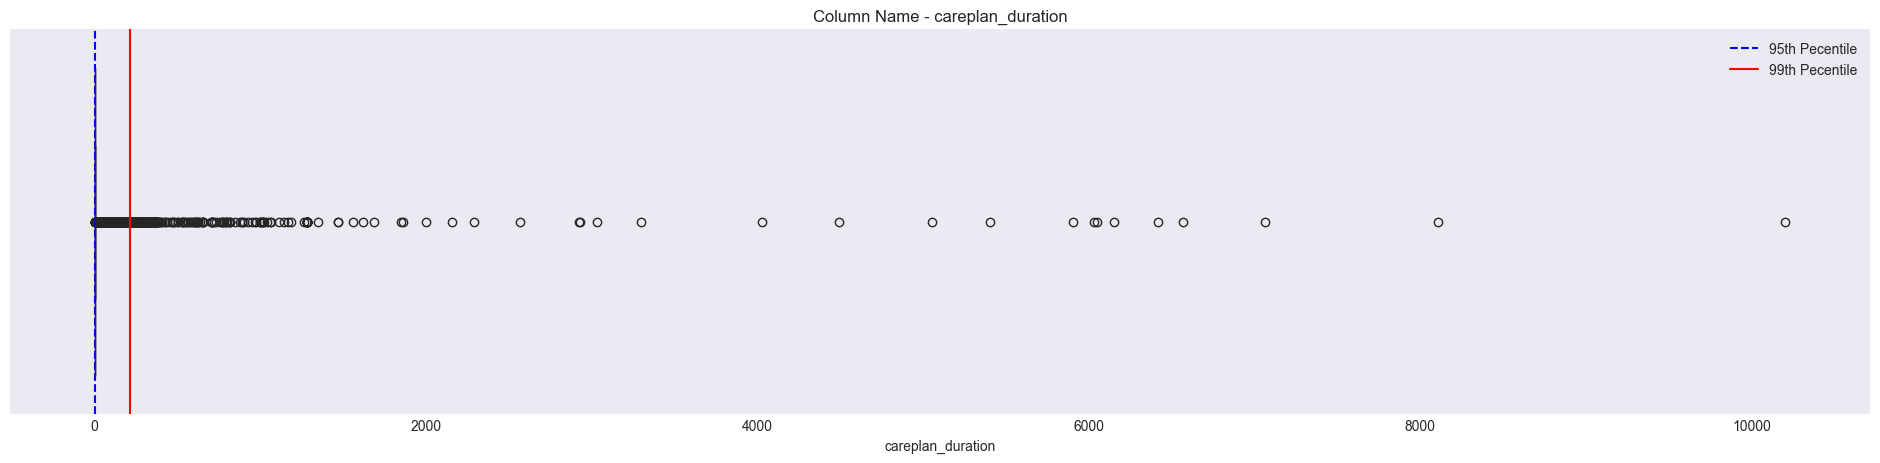

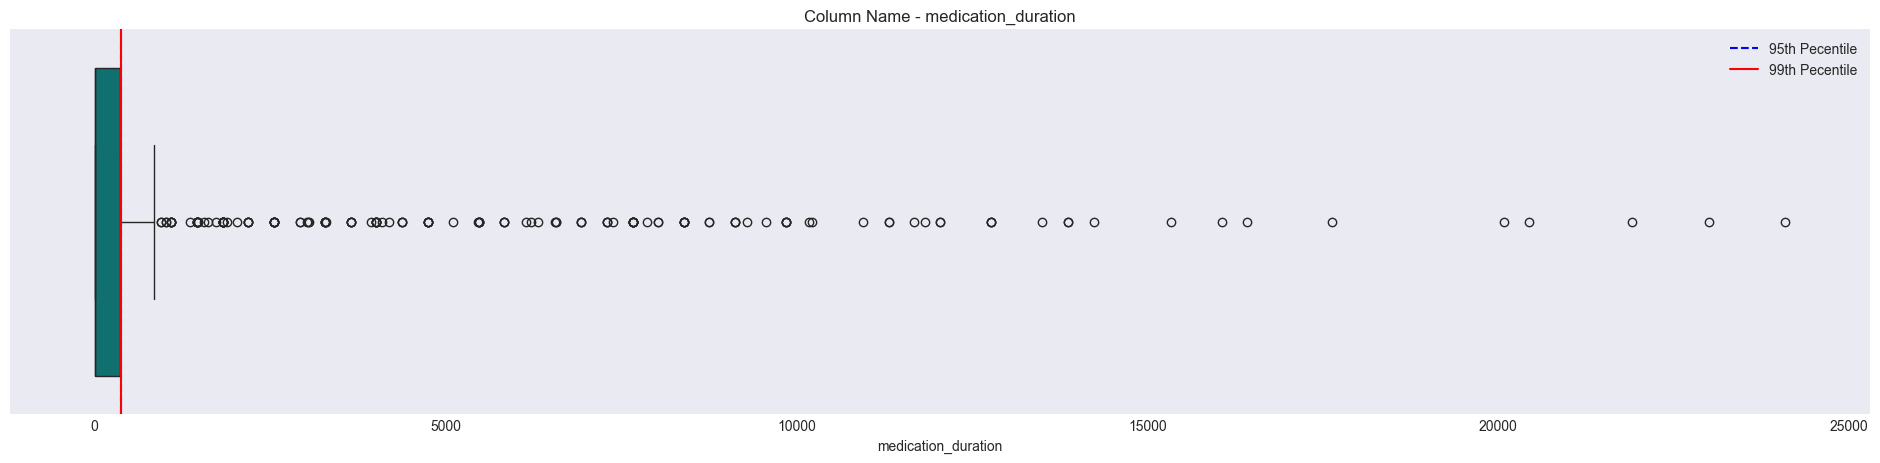

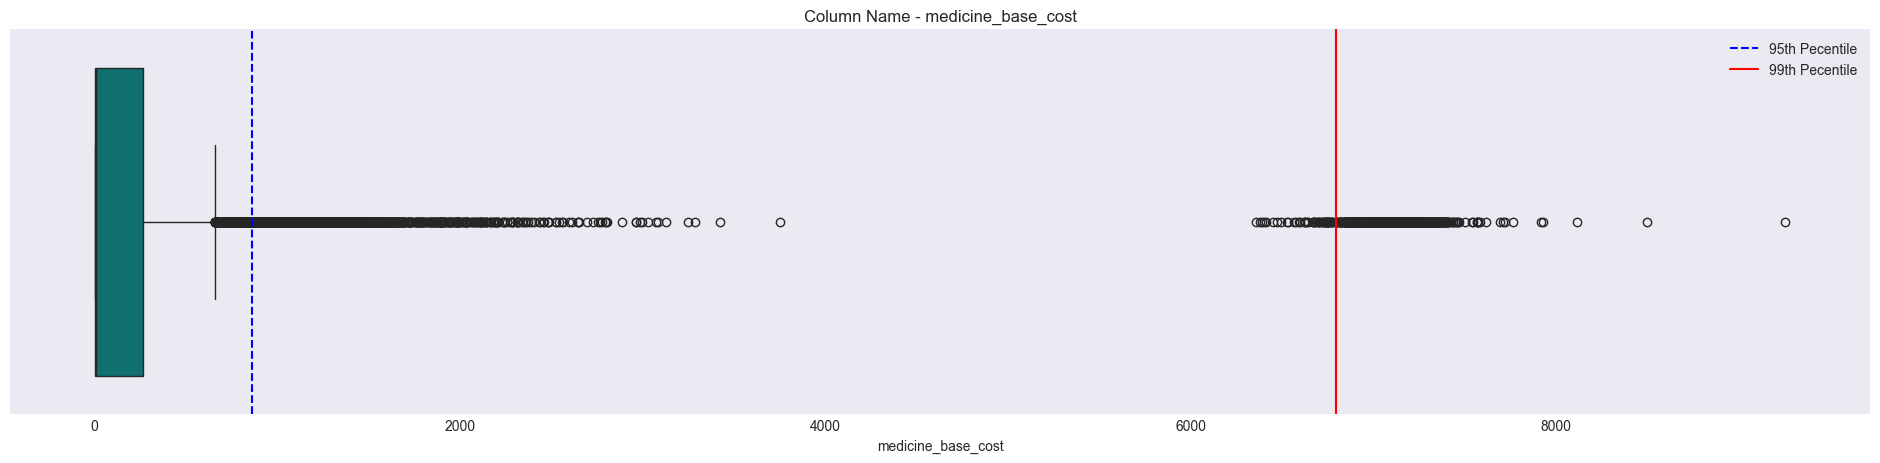

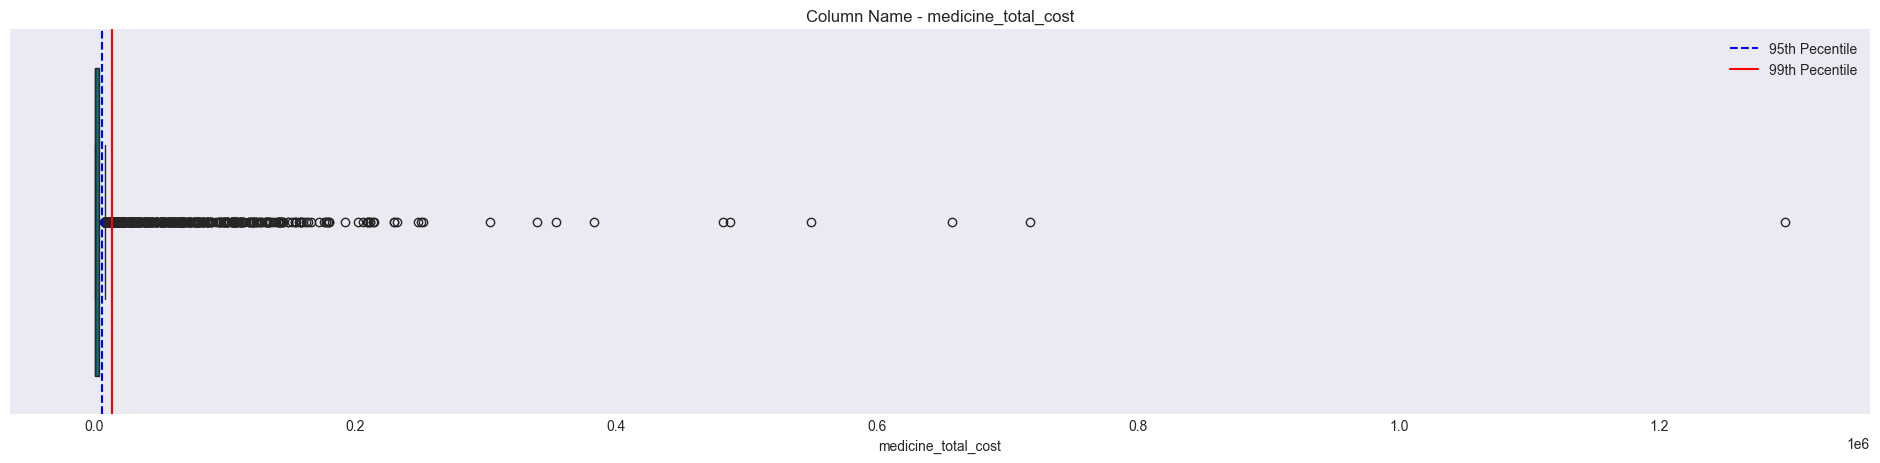

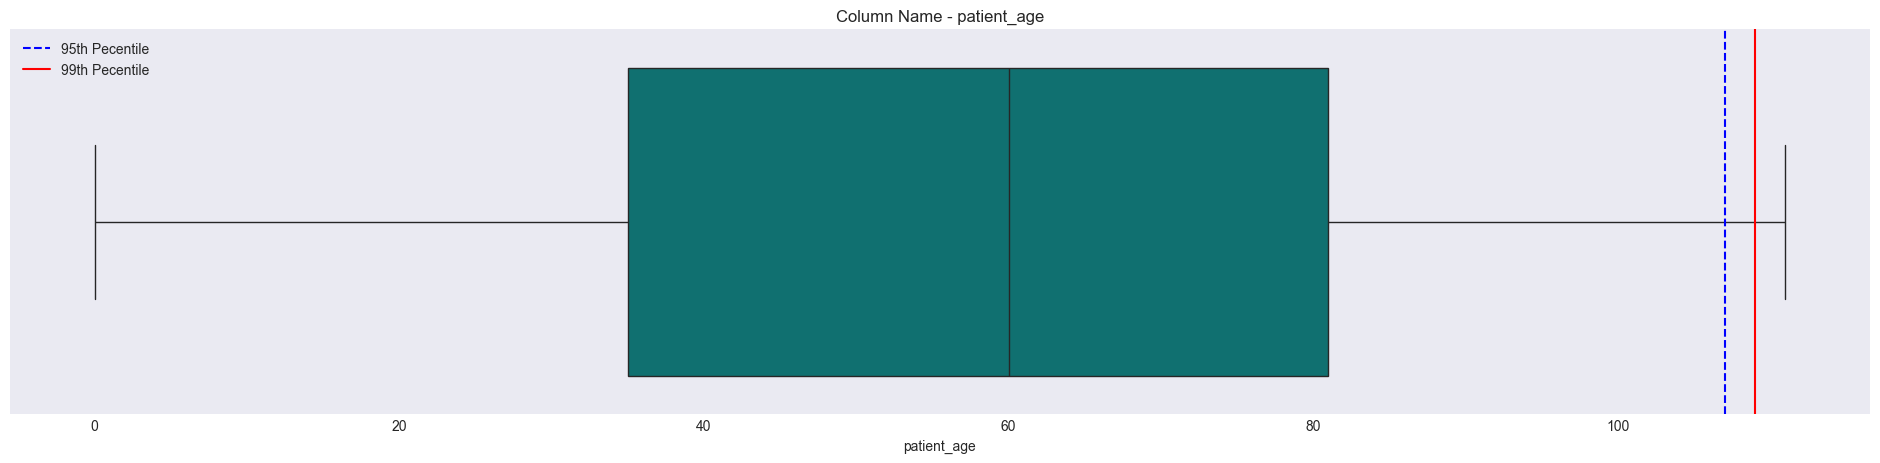

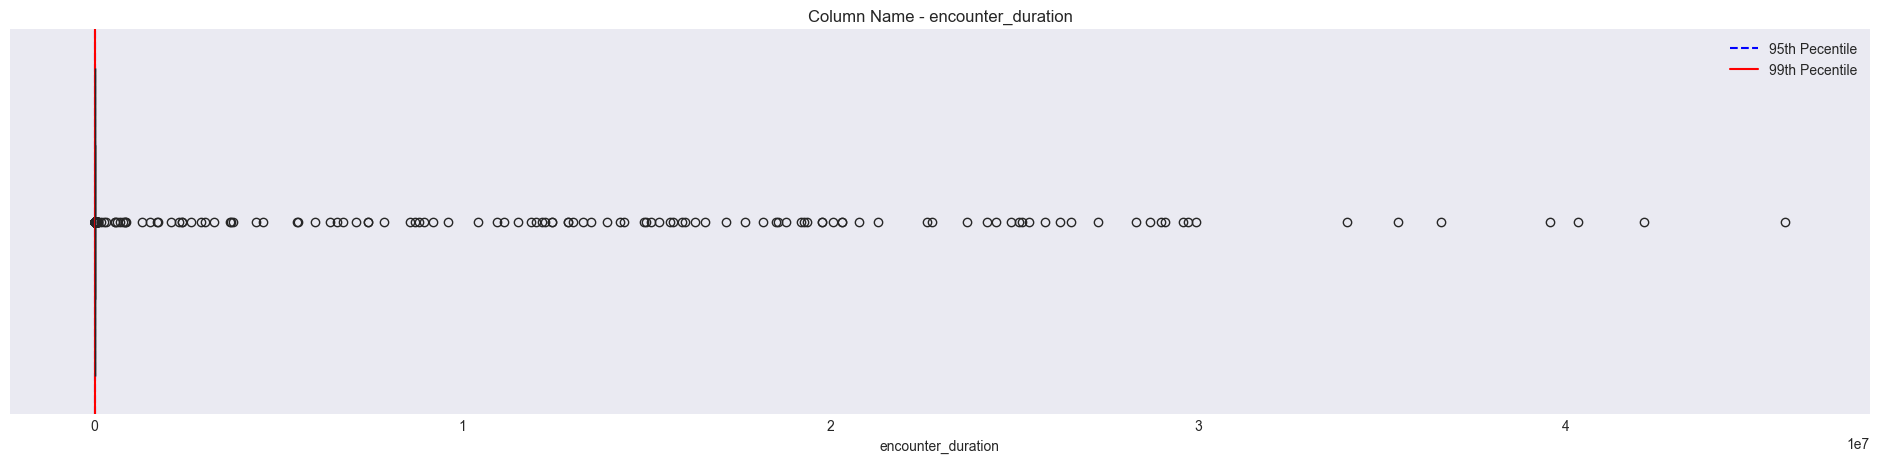

In [45]:
for cols in num_cols:
    plt.figure(figsize=(24,5))
    sns.boxplot(data[cols],color='teal',orient='h')
    plt.axvline(data[cols].quantile(.95),linestyle = "--",color = 'blue',label = '95th Pecentile')
    plt.axvline(data[cols].quantile(.99),linestyle = "-",color = 'red',label = '99th Pecentile')
    plt.title(f"Column Name - {cols}")
    plt.legend()
    plt.show()

`THERE ARE LONG ENCOUNTER DURATIONS`

`AGE HAS NO OUTLIERS`

`MEDICINE TOTAL COST HAVE HIGH OUTLIERS AND ONE VALUE AT EXTREME POINT`

`THERE IS A GAP IN MEDICINCE PRICE FROM 4000 TO 6000 AND IT HAS OUTLIERS TOO`

`THERE IS HIGH MEDICINE DURATION LIKE APPROX 70 YEARS`

`THERE ARE HIGH OUTLIERS IN CAERPLAN DURATION COLUMN TOO`

In [46]:
encounter_per_month = data['encounter_start'].dt.month.value_counts(normalize=True).mul(100).round(2).sort_index().reset_index(name = 'percentage')

In [47]:
encounter_per_month['cumsum']=np.cumsum(encounter_per_month['percentage'])

In [48]:
encounter_per_month

,encounter_start,percentage,cumsum
0,1,7.74,7.74
1,2,7.14,14.88
2,3,8.53,23.41
3,4,8.33,31.74
4,5,8.60,40.34
5,6,8.33,48.67
6,7,8.77,57.44
7,8,8.63,66.07
8,9,8.32,74.39
9,10,8.69,83.08


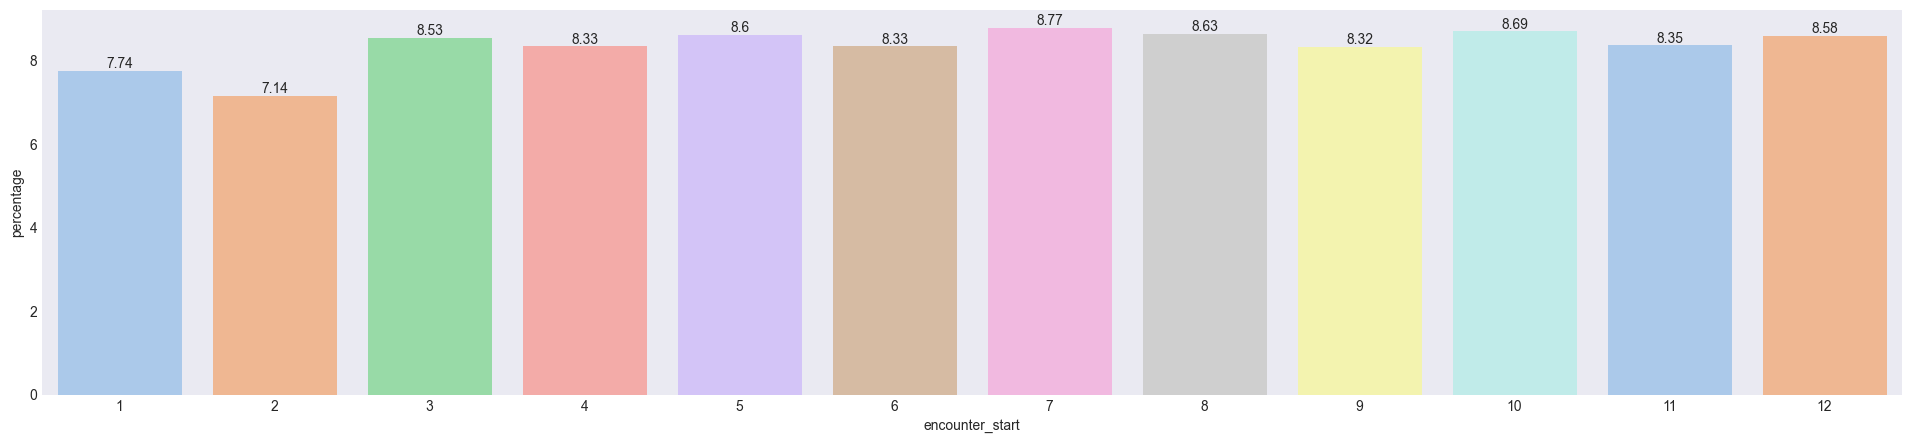

In [49]:
plt.figure(figsize=(24,5))
ax = sns.barplot(y='percentage',x='encounter_start',data = encounter_per_month,palette = 'pastel',orient='v')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [50]:
encounter_per_year = data['encounter_start'].dt.year.value_counts(normalize=True).mul(100).round(2).sort_index().reset_index(name = 'percentage')

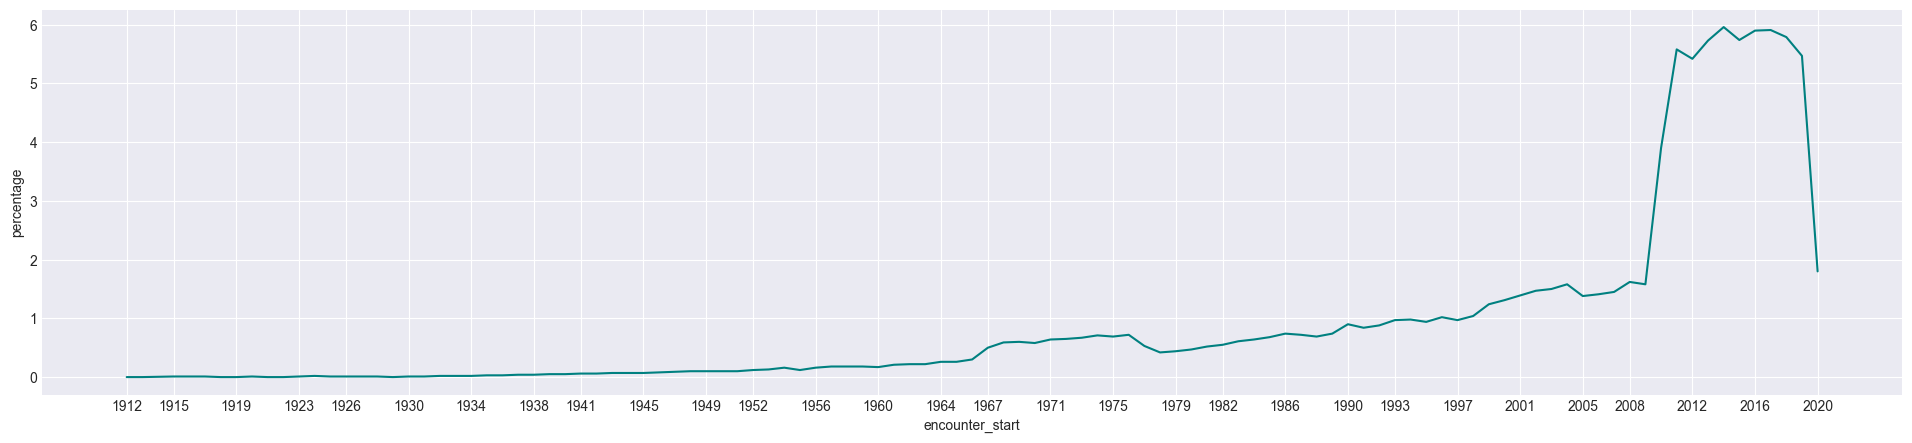

In [51]:
plt.figure(figsize=(24,5))
sns.lineplot(x = 'encounter_start',y='percentage',data = encounter_per_year,color = 'teal',linestyle = "-")
plt.xticks(np.linspace(1912,2020,30).astype(int))
plt.grid()
plt.show()

`SUDDEN PEAK IN ENCOUNTERS AFTER 2008, AND A LITTLE PEAK BETWEEN 1967 AND 1975`

### `BIVARIATE ANALYSIS`

In [52]:
cat_cols

['class',
 'readmission',
 'marital',
 'race',
 'ethnicity',
 'gender',
 'total_conditions',
 'total_careplans',
 'total_careplan_reasons',
 'medicins']

In [67]:
def readmission_rate_per_category(category):
    temp = data[data['readmission']=='1'].groupby(category).size().reset_index(name = 'total')
    temp1 = data.groupby(category).size().reset_index(name = 'total_count')
    temp3 = temp.merge(temp1, on = category,how = 'left')
    temp3['rate'] = (temp3['total']/temp3['total_count']).mul(100).round(2)
    plt.figure(figsize=(24,5))
    ax = sns.barplot(y = category,
                     x = 'rate',
                     data = temp3,
                     orient = 'h',
                     palette = 'pastel')
    for container in ax.containers:
        ax.bar_label(container,rotation = 90,weight = 'bold')
    plt.title(f"Readmission Rate Per {category}",weight = 'bold')
    plt.yticks(fontsize = 15)
    plt.show()

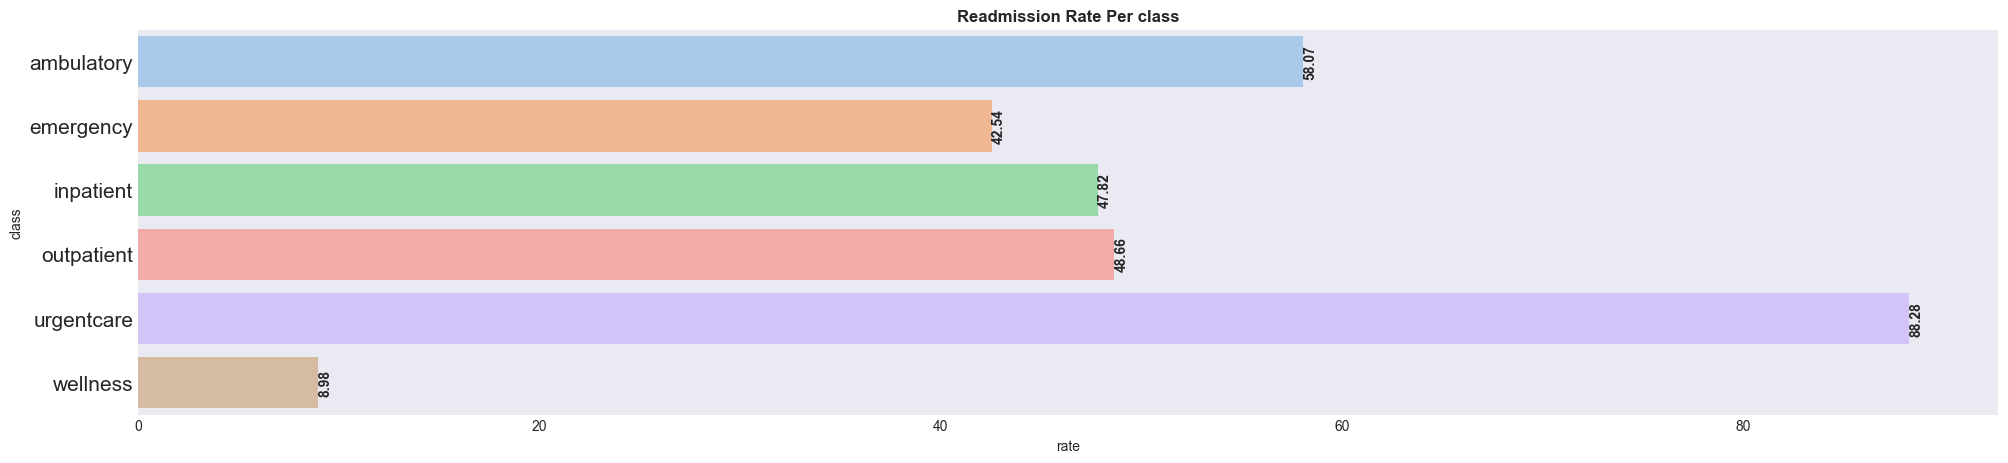

In [68]:
readmission_rate_per_category('class')

`READMISSION RATE IS HIGHEST FOR URGENTCARE CLASS AND LOWEST FOR WELLNESS AS WELLNESS IS REGULAR CHECKUPS`

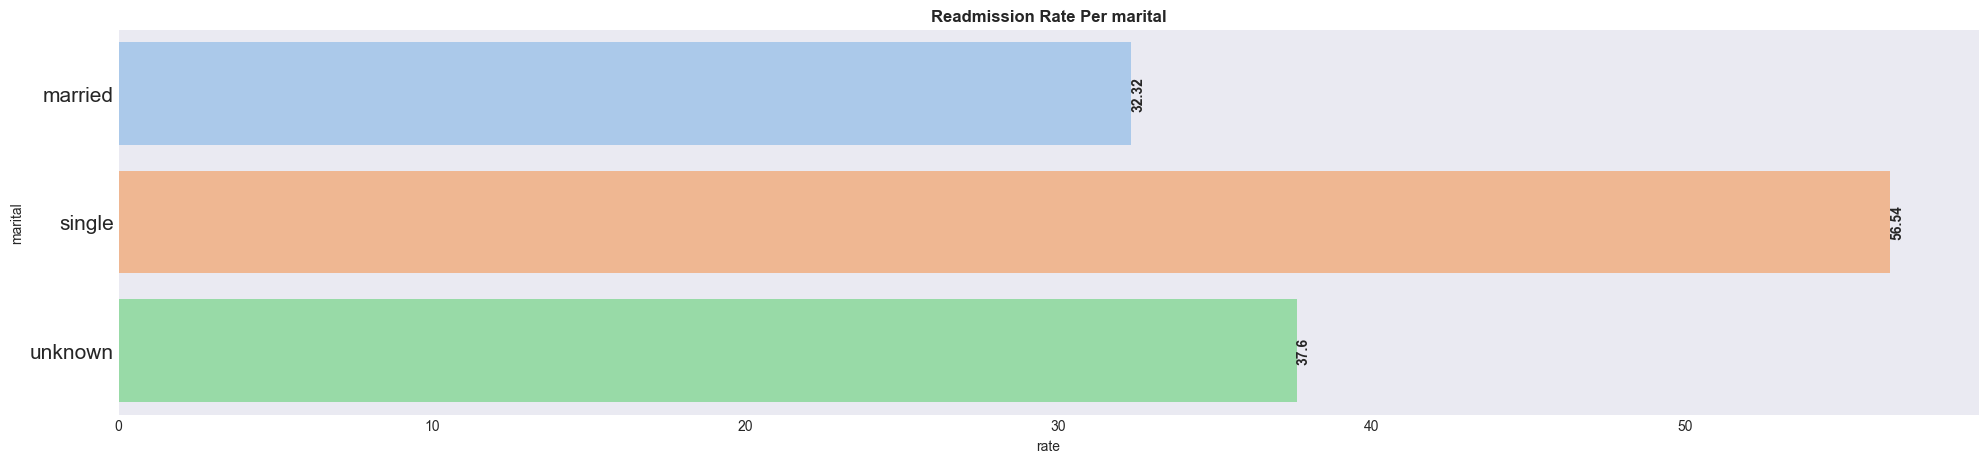

In [69]:
readmission_rate_per_category('marital')

`READMISSION RATE FOR SINGLE IS THE HIGHEST`

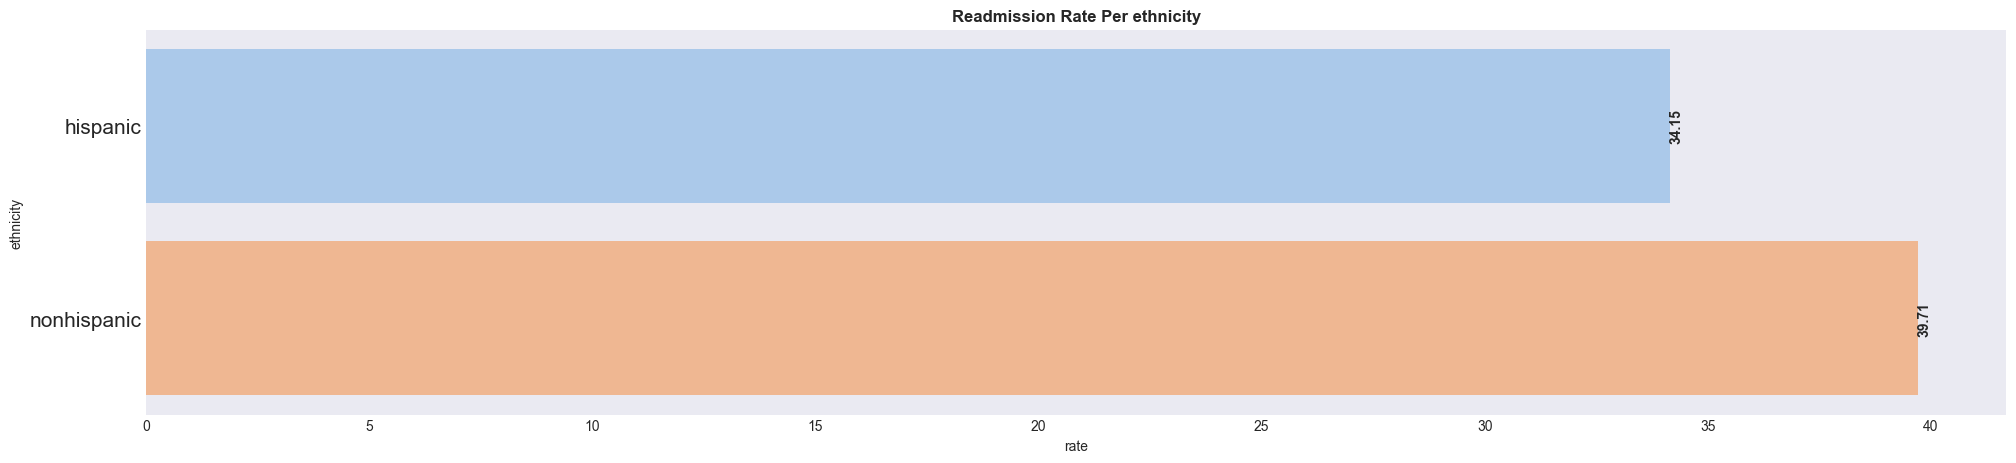

In [70]:
readmission_rate_per_category('ethnicity')

`ETHNICITY IS NOT A STRONG INDICATOR`

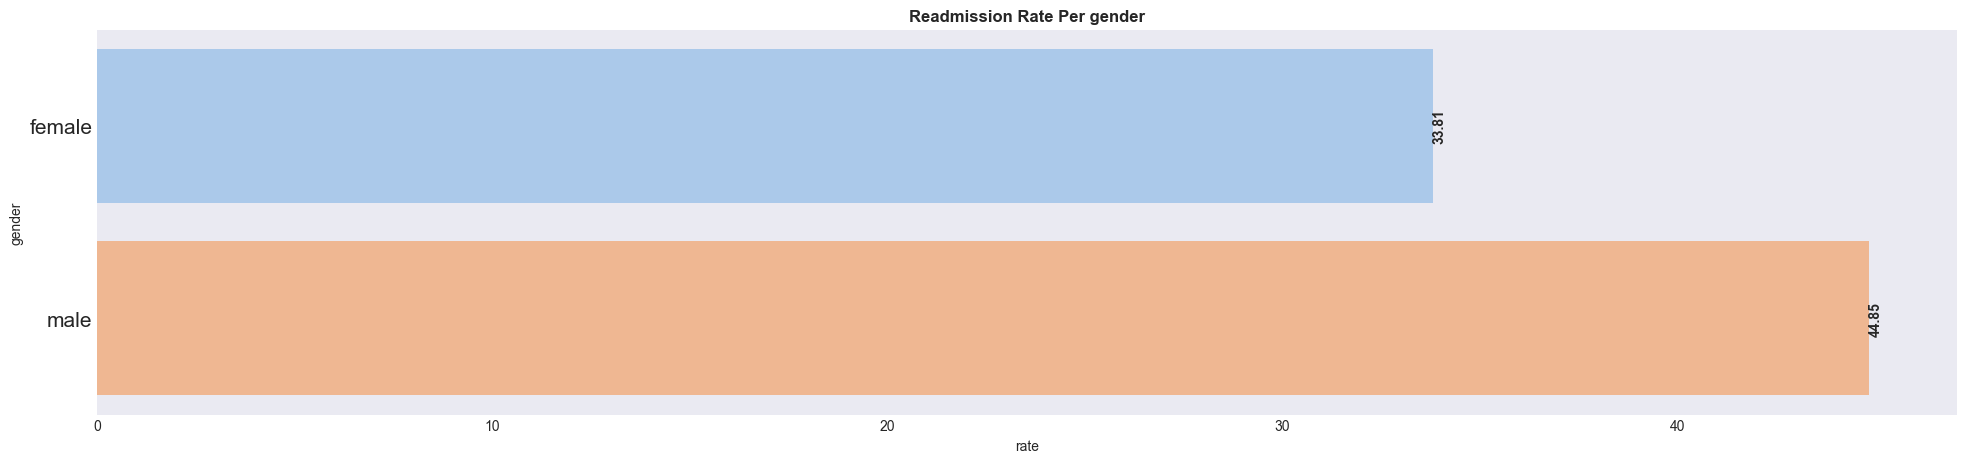

In [71]:
readmission_rate_per_category('gender')

`MALE HAVE HIGHER READMISSION RATE, BUT GENDER IS NOT A STRONG INDICATOR`

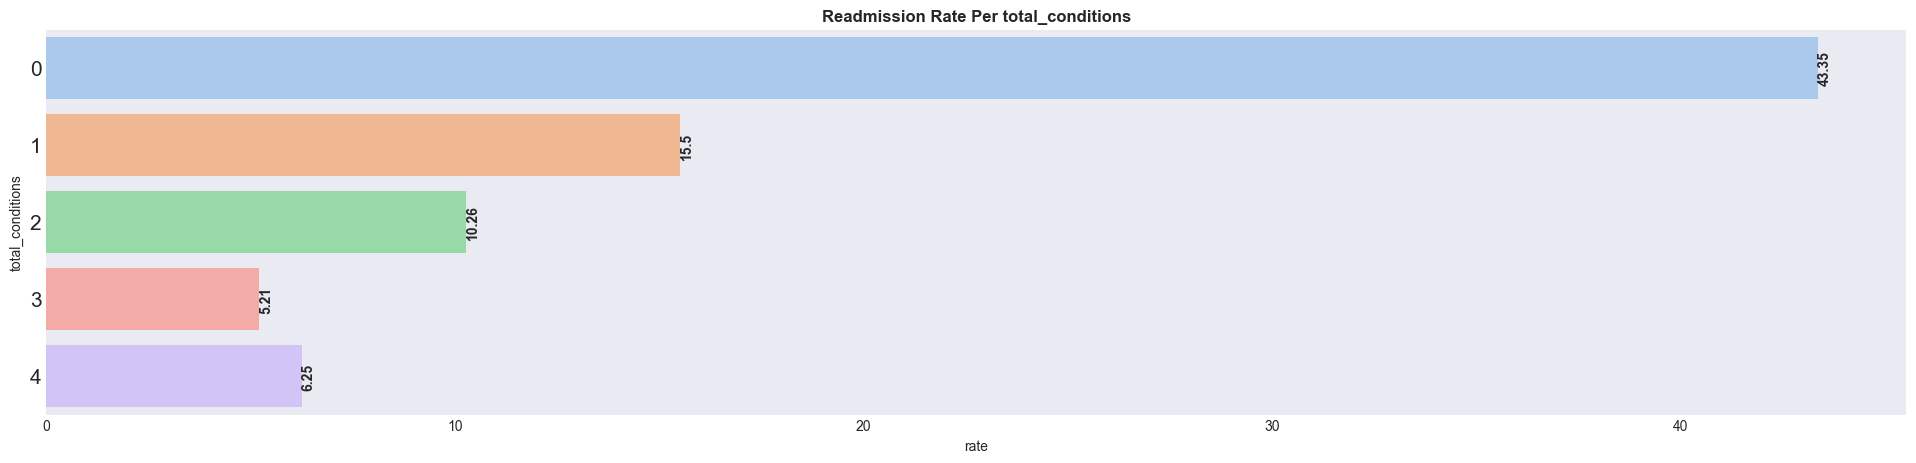

In [73]:
readmission_rate_per_category('total_conditions')

`HIGHER READMISSION RATE IS FROM 0 DETECTED TOTAL CONDITIONS`

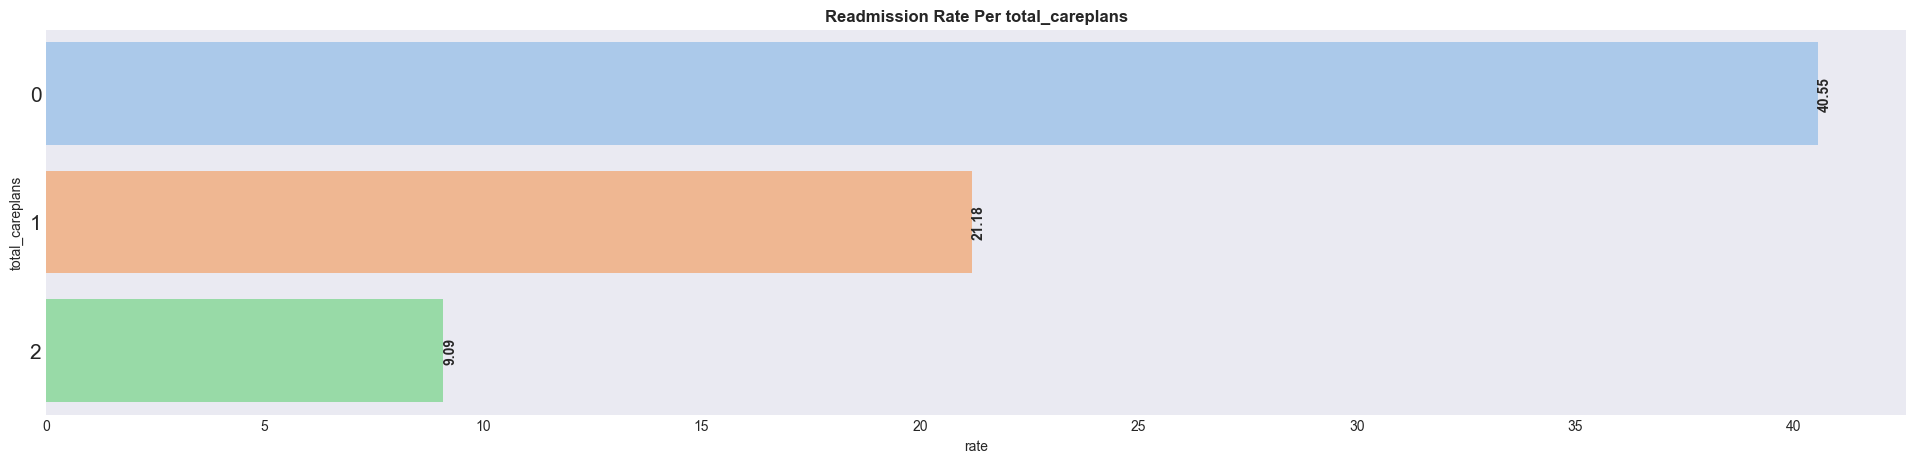

In [74]:
readmission_rate_per_category('total_careplans')

`READMISSION RATE IS HIGHER WHEN THERE IS NO CAREPLAN, MORE THE CAREPLAN - LESS THE READMISSION RATE`

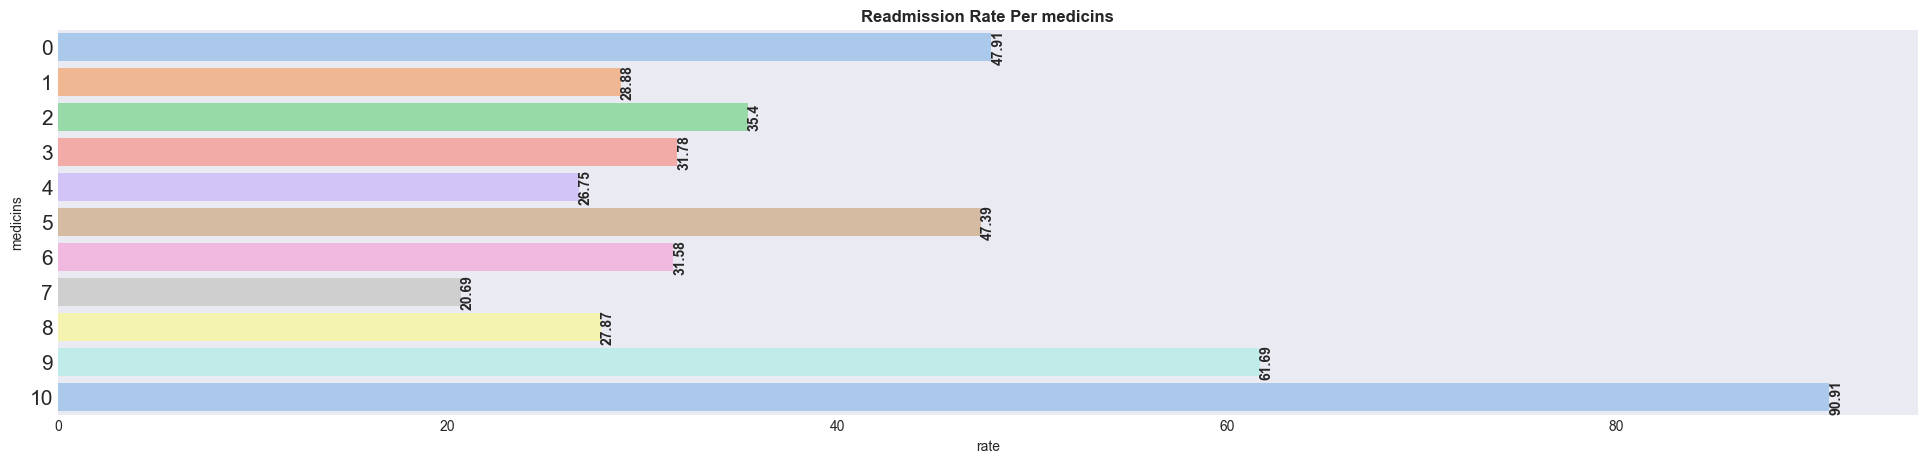

In [75]:
readmission_rate_per_category('medicins')

`READMISSION RATE IS HIGHER FOR LOWER AND HIGHER MEDICATIONS, BUT IN MIDDLE IT THE RELATION IS IRREGULAR`